In [2]:
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split

In [47]:
data = pd.read_csv('data/car.data', names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], 
                   header = None)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [35]:
data['buying']

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object

In [107]:
data['persons'].value_counts()

2    576
4    576
5    576
Name: persons, dtype: int64

In [49]:
# buying열 값 바꾸기
data['buying'] = data['buying'].map({'low': 1,
                             'med': 2,
                             'high': 3,
                             'vhigh' : 4})


In [50]:
# maint열 값 바꾸기
data['maint'] = data['maint'].map({'low': 1,
                             'med': 2,
                             'high': 3,
                             'vhigh' : 4},
                             na_action=None)

In [48]:
# doors열 값 바꾸기
data['doors'] = data['doors'].map({'5more': 5, '2':2, '3':3, '4':4})

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [52]:
# persons열 값 바꾸기
data['persons'] = data['persons'].map({'more': 5, '2':2, '4':4})

In [55]:
# lug_boot열 값 바꾸기
data['lug_boot'] = data['lug_boot'].map({'small': 1, 'med':2, 'big':3})

In [56]:
# safety열 값 바꾸기
data['safety'] = data['safety'].map({'low': 1, 'med':2, 'high':3})

In [57]:
# class열 값 바꾸기
data['class'] = data['class'].map({'unacc': 1, 'acc':2, 'good':3, 'vgood':4})

In [60]:
x_data = data.drop(['class'],axis=1)
y_data = data['class']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 0)

In [61]:
print(X_train)

      buying  maint  doors  persons  lug_boot  safety
520        3      4      5        2         3       2
621        3      3      5        2         1       1
1017       2      3      3        5         1       1
1273       2      1      5        2         2       2
924        2      4      4        2         3       1
...      ...    ...    ...      ...       ...     ...
835        3      1      4        5         3       2
1216       2      1      3        2         1       2
1653       1      1      3        2         3       1
559        3      3      2        5         1       2
684        3      2      3        4         1       1

[1296 rows x 6 columns]


In [62]:
y_train[:5]

520     1
621     1
1017    1
1273    1
924     1
Name: class, dtype: int64

In [37]:
X_test.shape

(432, 6)

In [38]:
y_test.shape

(432,)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2).fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.996141975308642
0.9629629629629629


In [99]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.996141975308642
0.9745370370370371


In [80]:
# Regulation
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01).fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.8942901234567902
0.875
0.8302469135802469
0.7916666666666666


In [81]:
x_data.shape

(1728, 6)

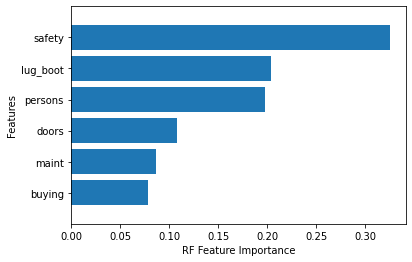

In [98]:
# RF Feature Importance Visualization

def plot_feature_importances_car(model):
    n_features = x_data.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), x_data.columns)
    plt.xlabel('RF Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_car(forest)

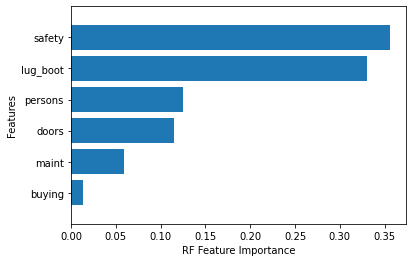

In [100]:
# GBRT Feature Importance Visualization
plot_feature_importances_car(gbrt)

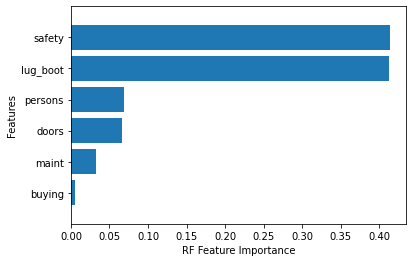

In [101]:
# GBRT Feature Importance Visualization After Regulation ( For 'max_depth' )
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)
plot_feature_importances_car(gbrt)


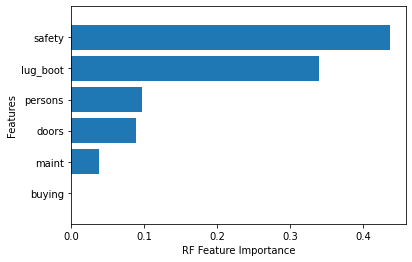

In [102]:
# GBRT Feature Importance Visualization After Regulation ( For 'learning_rate' )
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01).fit(X_train, y_train)
plot_feature_importances_car(gbrt)

In [104]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9560185185185185
0.9444444444444444


In [93]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [108]:
### 예측
# buying : med(2), 
#    maint : high, 
#        doors : 3, 
#            persons : more, 
#                lug_boot : med,
#                    safety : high

X_new = np.array([[2, 3, 4, 5, 2, 3]])
print(X_new.shape)

(1, 6)


In [111]:
# prediction RF
prediction = forest.predict(X_new)
print('예측:', prediction)
print('예측 클래스:',
      data['class'][prediction])

예측: [2]
예측 클래스: 2    1
Name: class, dtype: int64


In [114]:
# prediction GBRT
pred_gbrt = gbrt.predict(X_new)
print('예측:', pred_gbrt)
print('예측 클래스:',
      data['class'][pred_gbrt])

예측: [2]
예측 클래스: 2    1
Name: class, dtype: int64


In [115]:

y_pred = forest.predict(X_test)
print(y_pred)

[2 2 1 1 1 4 1 2 2 1 1 1 2 1 1 2 1 1 2 1 3 2 2 1 1 1 1 1 1 1 3 2 1 2 3 1 1
 1 1 1 1 1 2 1 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 2 2 2
 3 2 1 1 2 1 2 2 2 2 1 1 1 3 1 1 1 2 1 1 1 4 1 2 2 1 1 1 2 1 4 2 1 2 1 1 1
 1 1 2 1 3 2 1 1 1 1 1 2 1 1 1 1 2 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 1 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 2
 1 3 1 1 1 1 2 1 1 1 2 1 3 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2
 1 4 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 3 2 2 2 2 1 1
 1 1 1 1 2 1 1 4 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 4 3 1 1 1 1 1 1 1
 1 1 1 2 1 2 2 3 3 1 2 1 2 1 3 1 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 2 1 3
 1 3 1 1 1 4 1 1 4 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 2 1 1 3 4 2 2 1 4
 1 1 1 2 1 1 1 2 1 2 3 1 3 1 1 1 2 1 1 1 1 1 1 4 1 1 2 1 1 1 1 2 1 1 4 1 1
 1 1 2 1 1 1 1 1 1 2 2 1 2 1 3 4 1 1 1 4 1 1 2 1 2]


In [116]:
# 테스트 세트의 정확도
print(np.mean(y_pred == y_test))

0.9629629629629629


In [117]:
print(forest.score(X_test, y_test))

0.9629629629629629


In [118]:
print(gbrt.score(X_test, y_test))

0.7916666666666666


In [ ]:
for k in [2, 3, 4, 5, 2, 3]:
    print(y_test.iloc[k], '\t',
         )

In [ ]:
from sklearn.compose import ColumnTrnasformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('onehot', OneHotEncoder(sparse=False), 
                         ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])])
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ValueError: X has 2 features, but MLPClassifier is expecting 6 features as input.

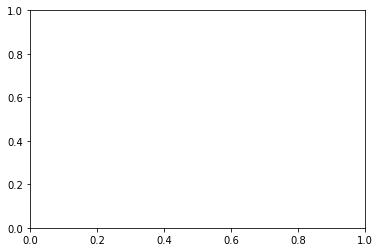

In [94]:
# 신경망
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)